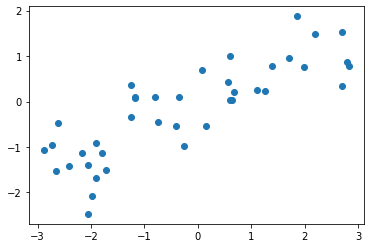

In [1]:
from matplotlib import pyplot as plt
from mglearn import datasets
x, y  = datasets.make_wave(n_samples = 40)
plt.scatter(x,y)

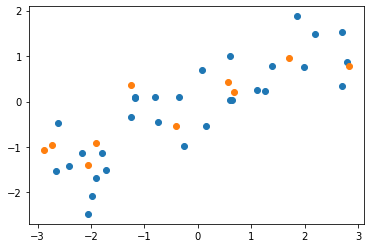

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [3]:
lr = LinearRegression().fit(X_train, y_train)
print('lr coeff = {}'.format(lr.coef_))
print('lr intercept ={}'.format(lr.intercept_))

lr coeff = [0.52424272]
lr intercept =-0.09394309015377249


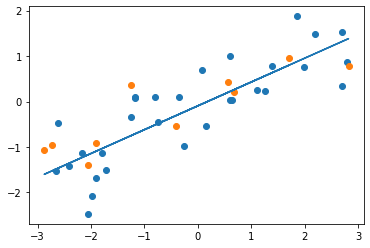

In [4]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, X_test*lr.coef_ +lr.intercept_)

In [5]:
print('точность на тренировочных данных: {:.2f}'.format(lr.score(X_train, y_train)))
print('точность на тестовых данных: {:.2f}'.format(lr.score(X_test, y_test)))

точность на тренировочных данных: 0.69
точность на тестовых данных: 0.63


In [6]:
#Передаем набор с тестовыми признаками для прогноза y
y_pred = lr.predict(X_test)
y_pred

array([-0.74774302,  0.2578853 ,  0.80306544, -1.17592143, -1.60192362,
       -1.08978037,  0.1967429 ,  1.38413782, -0.30800706, -1.5205635 ])

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Задание: изучить набор данных boston_house, применить линейный классификатор для прогноза медианной цены. Организовать DataFrame на основе тестовых данных(в качестве столбцов использовать признаки, значения y_test, значения y_pred, разницу между y_pred и y_test). Вывести полученные значения весовых коэффициентов и свободного b, вычислить точность.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state = 3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 13), (379,), (127, 13), (127,))

In [11]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
lr = LinearRegression().fit(X_train, y_train)
print('lr coeff = {}'.format(lr.coef_))
print('lr intercept ={}'.format(lr.intercept_))

lr coeff = [ -0.13   0.05  -0.03   3.33 -15.82   3.35   0.01  -1.31   0.32  -0.01
  -0.95   0.01  -0.52]
lr intercept =36.38321531227356


In [12]:
print('точность на тренировочных данных: {:.2f}'.format(lr.score(X_train, y_train)))
print('точность на тестовых данных: {:.2f}'.format(lr.score(X_test, y_test)))

точность на тренировочных данных: 0.73
точность на тестовых данных: 0.77


In [13]:
import pandas as pd
df = pd.DataFrame(X_test, columns=boston['feature_names'])
y_pred = np.round(lr.predict(X_test), 1)
df['y_test'] = y_test
df['y_pred'] = y_pred
df['y_diff'] = np.abs(y_test - y_pred)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y_test,y_pred,y_diff
0,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8,37.3,7.5
1,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1,18.7,1.6
2,8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74,17.8,22.5,4.7
3,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,33.1,32.5,0.6
4,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,24.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5,19.6,7.1
123,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6,21.7,2.1
124,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7,14.4,5.3
125,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47,19.5,18.6,0.9


In [14]:
print('Медиана от предсказанных {}'.format(np.median(y_pred)))
print('Медиана от входных данных {}'.format(np.median(y_test)))

Медиана от предсказанных 21.9
Медиана от входных данных 21.0


In [15]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor().fit(X_train, y_train)
importances_forest = forest.feature_importances_
importances_forest

array([0.04, 0.01, 0.06, 0.02, 0.04, 0.27, 0.02, 0.03, 0.02, 0.03, 0.05,
       0.02, 0.39])

In [16]:
from sklearn.preprocessing import normalize
norm = np.apply_along_axis(lambda x: np.mean(x), 0, X_train)
importances_calculated = normalize(np.abs([lr.coef_ * norm]))[0]
importances_calculated

array([0.02, 0.02, 0.01, 0.01, 0.29, 0.69, 0.01, 0.16, 0.1 , 0.14, 0.57,
       0.12, 0.22])

In [17]:
pd.DataFrame([importances_forest, importances_calculated], columns=boston['feature_names'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.043816,0.009542,0.062601,0.018798,0.038036,0.269482,0.020649,0.033485,0.017122,0.029229,0.045000,0.019899,0.392341
1,0.015052,0.017955,0.011920,0.007736,0.286342,0.687086,0.013524,0.161895,0.100830,0.140653,0.571581,0.124253,0.216067


In [18]:
from itertools import combinations

def extend_data(data):
    index = range(data.shape[1])
    combinated = np.array([data[:, i] * data[:, j] for i, j in combinations(index, 2)]).T
    extended = np.append(data, data ** 2, 1)
    extended = np.append(extended, combinated, 1)
    return extended

X_train_extended = extend_data(X_train)
X_test_extended = extend_data(X_test)
X_train_extended.shape, X_test_extended.shape

((379, 104), (127, 104))

In [19]:
lr_extended = LinearRegression().fit(X_train_extended, y_train)
print('точность на тренировочных данных: {:.2f}'.format(lr_extended.score(X_train_extended, y_train)))
print('точность на тестовых данных: {:.2f}'.format(lr_extended.score(X_test_extended, y_test)))
print('lr coeff = {}'.format(lr_extended.coef_))
print('lr intercept ={}'.format(lr_extended.intercept_))

точность на тренировочных данных: 0.93
точность на тестовых данных: 0.84
lr coeff = [ -7.42  -0.51  -6.38  29.66  79.65  20.34   1.08  -7.16   3.87  -0.01
   2.29  -0.09   0.45   0.    -0.     0.04  29.66 -16.14   0.11   0.
   0.42  -0.15  -0.     0.05  -0.     0.03   0.2   -0.27   2.87   0.47
   0.03  -0.    -0.13  -0.57   0.04   0.    -0.     0.    -0.01  -0.13
  -1.15   0.04   0.     0.    -0.01   0.    -0.01   0.    -0.    -0.12
   2.39   0.22   0.     0.22  -0.08   0.    -0.02   0.01  -0.   -38.86
  -3.83  -0.07  -0.59  -0.46   0.02  -1.09   0.03  -0.24   5.34  -0.41
  17.32  -2.43   0.16 -11.5    0.     0.53  -0.08   0.11  -0.09  -0.02
  -0.49   0.    -0.09   0.     0.01  -0.    -0.    -0.    -0.01  -0.19
  -0.    -0.16  -0.01   0.04   0.01  -0.11  -0.    -0.03   0.01  -0.
  -0.     0.01   0.    -0.  ]
lr intercept =-80.28451272758122
